In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import import_ipynb

In [2]:
##Importing the files with a comma separator provides some bugs####
from Data_investigation import drop_columns
from Data_investigation import load_and_combine

importing Jupyter notebook from Data_investigation.ipynb


In [3]:
from Data_investigation import filter_data

In [4]:
path1='./ka_devices.db'
path2='./ka_users.csv'
path3='./ka_actions.parquet'
columns_drop=['game_stats_tutorial_complete','index','device_os_s','device_mapped_s','geo_s','device_manufacturer_s','device_model_s','device_gpu_s','lang_s']

In [5]:
df=load_and_combine(path1,path2,path3)

In [6]:
df,s_nlls=filter_data(df)

In [7]:
df=drop_columns(df,columns_drop)

# Important variables  are 
    'redeemer_actions',
    'device_mem_i',
    'game_stats_xp',
    'scribe_actions',
    'game_stats_xp1 and 
    'game_stats_tutorial_complete_time

In [8]:
### Use percentile to group response,
## Response is initially numeric, turning into bins may help in setting thresholds 


### In this code we want to identify the top spenders 
def calculate_percentile(value):
    perc=df.total_spend.quantile(value)
    return perc

perc=[calculate_percentile(i) for i  in [0.25,0.5,0.75,0.99]]
print(perc)
###90th percentile is 80
    

[0.0, 0.0, 0.0, 80.0]


In [9]:
### We assign grouping based on 99th percentile which is 80 dollars 
df=df.assign(Spending_Likelihood=pd.cut(df['total_spend'], 
                               bins=[-1, 80,9999], 
                               labels=['Not as Likely', 'Likely']))


In [10]:
##Log transform data with large values for ease of visualization 
log_columns=['redeemer_actions','device_mem_i','game_stats_xp','scribe_actions','game_stats_xp1']
for i in log_columns:
    df['Log_'+str(i)]=np.log10(df[i])


C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
### Visualize to build general profile about total_Spending, use key variables
# a mapping function would work here to try the different combinations. BUt we have a size constraint on notebook so we do this one by one

### As shown in the next few blobs 

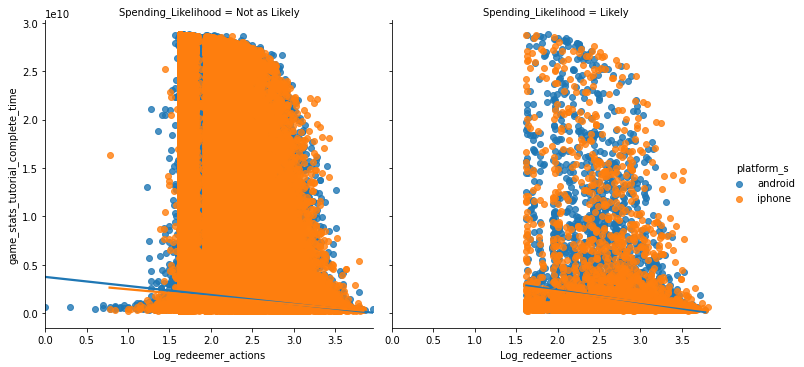

In [12]:
### Plotting the relationships between all of the important variables in the next few blobs. I wont vary the col parameter 
sns.lmplot(x='Log_redeemer_actions', y ='game_stats_tutorial_complete_time',hue='platform_s', col ='Spending_Likelihood',data=df)

## there seems to be a minimum value for Log_redeemer_actions given Spending_likelihood=likely.. value will be calculated at the end
# also a minimum value for game_stats_tutorial_complete_time.. Calculated at the end 
### Iphone  users seem to be concentrated at the bottom given spending is likely 

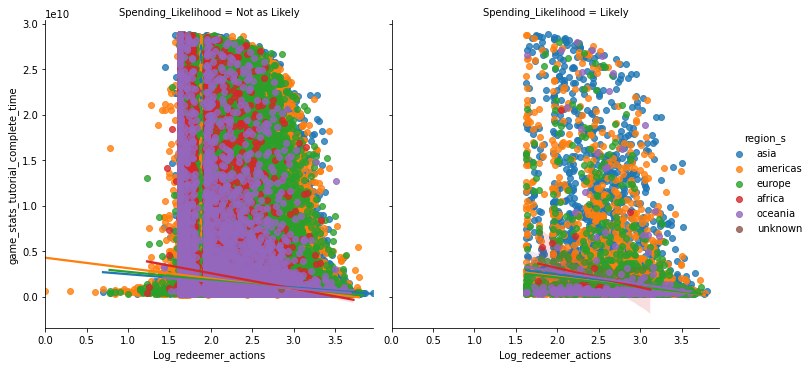

In [13]:
sns.lmplot(x='Log_redeemer_actions', y ='game_stats_tutorial_complete_time',hue='region_s', col ='Spending_Likelihood',data=df)
###oceania seems to be heavily concentrated at the bottom given spending is likely 

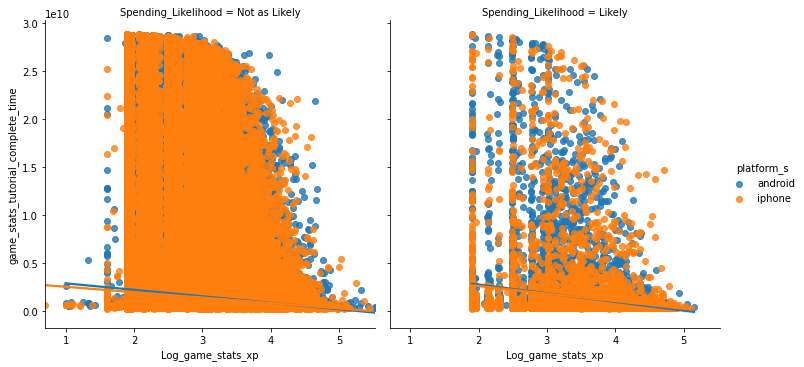

In [14]:
sns.lmplot(x='Log_game_stats_xp', y ='game_stats_tutorial_complete_time',hue='platform_s', col ='Spending_Likelihood',data=df)

###Nothing significant here 

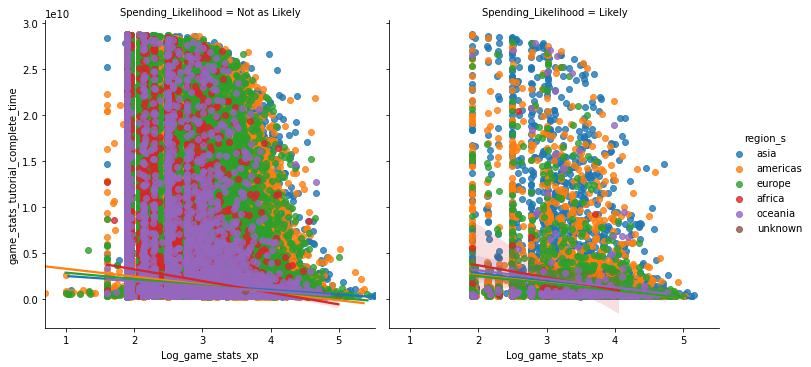

In [15]:
sns.lmplot(x='Log_game_stats_xp', y ='game_stats_tutorial_complete_time',hue='region_s', col ='Spending_Likelihood',data=df)
## Nothing striking 

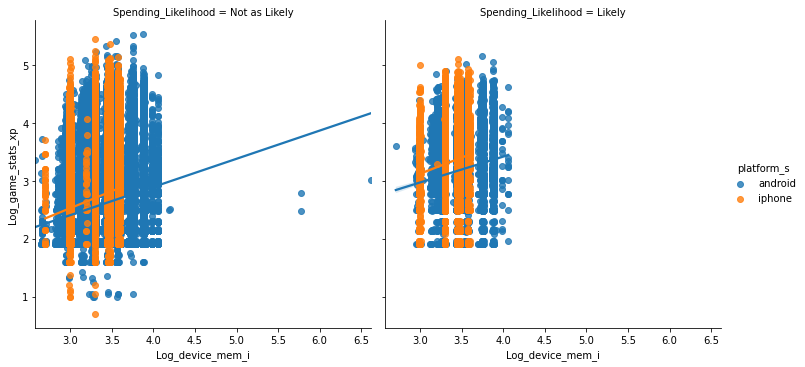

In [16]:
sns.lmplot(x='Log_device_mem_i', y ='Log_game_stats_xp',hue='platform_s', col ='Spending_Likelihood',data=df)

## Minimum values for game_stats_xp and device_mem_i can be determined given spending is likely
### compare the median device memory for android and apple given spending is likely  

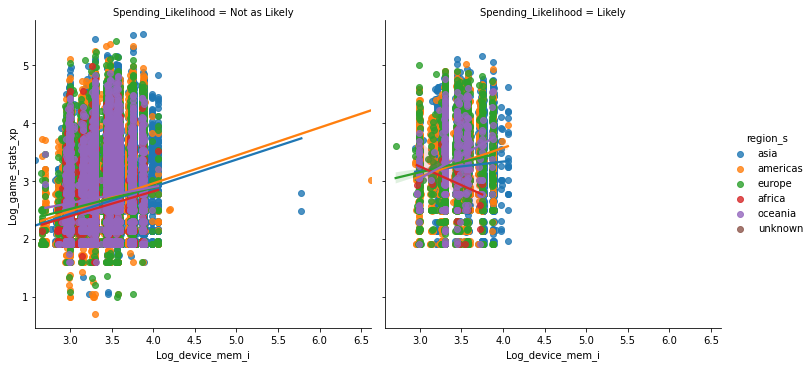

In [17]:
sns.lmplot(x='Log_device_mem_i', y ='Log_game_stats_xp',hue='region_s', col ='Spending_Likelihood',data=df)
## Nothing too significant 

C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\na

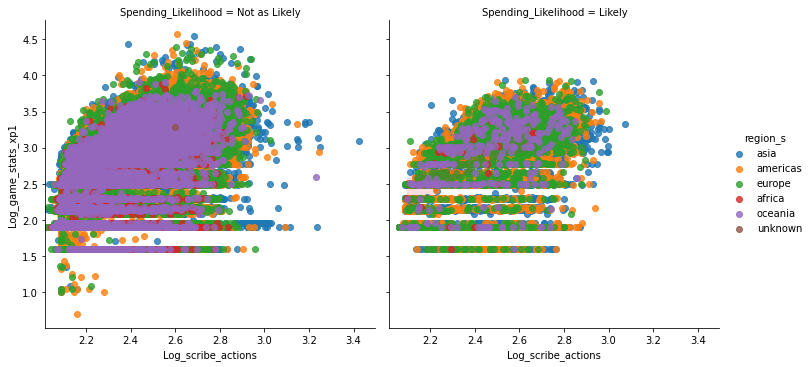

In [18]:
sns.lmplot(x='Log_scribe_actions', y ='Log_game_stats_xp1',hue='region_s', col ='Spending_Likelihood',data=df)
## nothing striking

C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


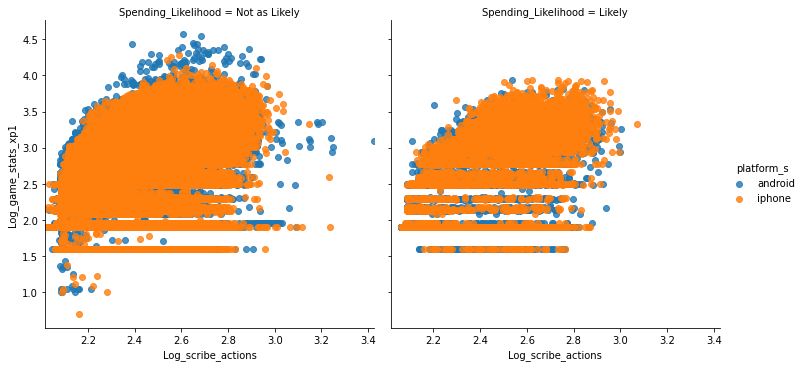

In [19]:
sns.lmplot(x='Log_scribe_actions', y ='Log_game_stats_xp1',hue='platform_s', col ='Spending_Likelihood',data=df)
## Nothing too significant 

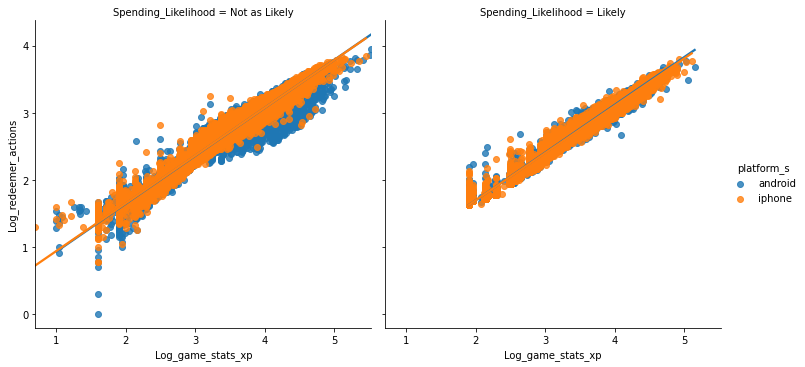

In [21]:
sns.lmplot(x='Log_game_stats_xp', y ='Log_redeemer_actions',hue='platform_s', col ='Spending_Likelihood',data=df)
## Nothing much here

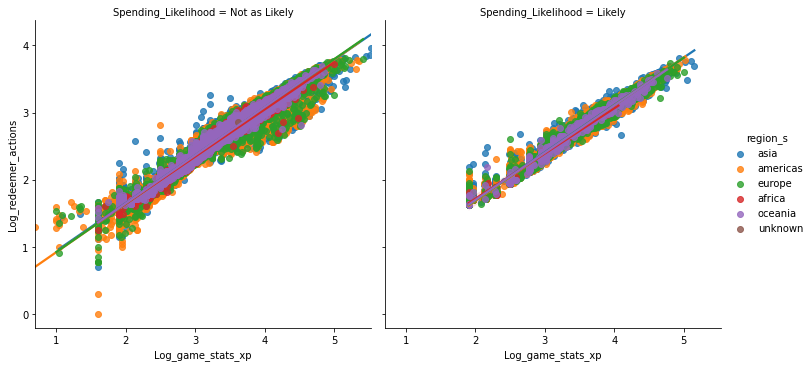

In [22]:
sns.lmplot(x='Log_game_stats_xp', y ='Log_redeemer_actions',hue='region_s', col ='Spending_Likelihood',data=df)
## There isn't much present here

In [24]:
## Quick calculations to find medians, minimums and maximums for profiles
## these values are referenced from the plots above

## codes  used for cell 1 
filtered_df=df.loc[(df['Spending_Likelihood']=='Likely')]
print(filtered_df['Log_redeemer_actions'].min())

filtered_df=df.loc[(df['Spending_Likelihood']=='Likely')]
print(filtered_df['game_stats_tutorial_complete_time'].min())

filtered_df=df.loc[(df['Spending_Likelihood']=='Likely') & (df['platform_s']=='iphone')]
print(filtered_df['game_stats_tutorial_complete_time'].median())

### This can be used as a comparisoin between apple and android
filtered_df=df.loc[(df['Spending_Likelihood']=='Likely') & (df['platform_s']=='android')]
print(filtered_df['game_stats_tutorial_complete_time'].median())

filtered_df=df.loc[(df['Spending_Likelihood']=='Likely')]
print(filtered_df['game_stats_tutorial_complete_time'].median())



### Cell2
filtered_df=df.loc[(df['Spending_Likelihood']=='Likely') &  (df['region_s']=='oceania')]
print(filtered_df['game_stats_tutorial_complete_time'].median)



### Cell 5

filtered_df=df.loc[(df['Spending_Likelihood']=='Likely') & (df['platform_s']=='iphone')]
print(filtered_df['Log_device_mem_i'].median())

filtered_df=df.loc[(df['Spending_Likelihood']=='Likely')]
print(filtered_df['Log_device_mem_i'].min())

filtered_df=df.loc[(df['Spending_Likelihood']=='Likely')]
print(filtered_df['Log_game_stats_xp'].min())

filtered_df=df.loc[(df['Spending_Likelihood']=='Likely') & (df['platform_s']=='android')]
print(filtered_df['Log_device_mem_i'].median())





## Copmarison to those that are likely 
filtered_df=df.loc[(df['Spending_Likelihood']=='Not as Likely') ]
print(filtered_df['game_stats_tutorial_complete_time'].median())



1.6232492903979006
256000000.0
506000000.0
609000000.0
571000000.0
<bound method NDFrame._add_numeric_operations.<locals>.median of 5124       4.530000e+08
6564       2.722000e+09
16236      5.660000e+08
28685      6.980000e+08
29099      2.708000e+10
               ...     
2759085    4.130000e+08
2779577    2.792100e+10
2782677    4.720000e+08
2799757    5.310000e+08
2836725    3.340000e+08
Name: game_stats_tutorial_complete_time, Length: 326, dtype: float64>
3.303412070596742
2.708420900134713
1.9030899869919435
3.5700757053216043
638000000.0
